In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.io import loadmat
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

# 一

## （1）
> 记$$\Theta^{(1)}=\begin{bmatrix}\Theta^{(1)}_{10}&&\Theta^{(1)}_{11}&&\Theta^{(1)}_{12}\\\Theta^{(1)}_{20}&&\Theta^{(1)}_{21}&&\Theta^{(1)}_{22}\end{bmatrix}$$
> $$\Downarrow$$
> $$z^{(2)}_1=\Theta^{(1)}_{10}x_0+\Theta^{(1)}_{11}x_1+\Theta^{(1)}_{12}x2 $$  
> $$z^{(2)}_1=\Theta^{(1)}_{20}x_0+\Theta^{(1)}_{21}x_1+\Theta^{(1)}_{22}x2 $$  
> $$\Downarrow$$
> $$a^{(2)}_1=g(z^{(2)}_1) $$  
> $$a^{(2)}_2=g(z^{(2)}_2) $$  
> 记$$\Theta^{(2)}=\begin{bmatrix}\Theta^{(2)}_{10}&&\Theta^{(2)}_{11}&&\Theta^{(2)}_{12}\end{bmatrix} $$  
> $$\Downarrow $$
> $$z^{(3)}_1=\Theta^{(2)}_{10}a^{(2)}_0+\Theta^{(2)}_{11}a^{(2)}_1+\Theta^{(2)}_{12}a^{(2)}_2$$
> $$\Downarrow $$
> $$a^{(3)}_1=g(z^{(3)}_1)$$  
> ***即$$h_\Theta(x)=g(z^{(3)}_1)=g(\Theta^{(2)}a^{(2)})=g(\Theta^{(2)}g(z^{(2)}))=g(\Theta^{(2)}g(\Theta^{(1)}x))$$***

## （2）
> 已知有：$$g'(x)=g(x)(1-g(x))$$
> 
> 则偏导数如下：  
> $$\frac{\partial h_\Theta(x)}{\partial x_1}=\frac{\partial g(\Theta^{(2)}g(\Theta^{(1)}x))}{\partial x_1}=\frac{\partial g(\Theta^{(2)}g(\Theta^{(1)}x))}{\partial g(\Theta^{(1)}x)}\frac{\partial g(\Theta^{(1)}x)}{\partial x_1}  $$  
> 记$$\Theta^{(1)}_1 = \begin{bmatrix}\Theta^{(1)}_{10}&&\Theta^{(1)}_{11}&&\Theta^{(1)}_{10} \end{bmatrix}$$
> $$\Theta^{(2)}_1 = \begin{bmatrix}\Theta^{(2)}_{20}&&\Theta^{(2)}_{21}&&\Theta^{(2)}_{20} \end{bmatrix}$$
> $$\Downarrow $$
> $$\frac{\partial h_\Theta(x)}{\partial x_1}=\begin{bmatrix}\Theta^{(2)}_{11}g'(\Theta^{(1)} x)+\Theta^{(2)}_{11}g'(\Theta^{(1)} x)\end{bmatrix}·\begin{Bmatrix}g(\Theta^{(2)}g(\Theta^{(1)}x))\begin{bmatrix}1-g(\Theta^{(2)}g(\Theta^{(1)}x))\end{bmatrix}\end{Bmatrix}$$
> $$\Downarrow $$
> $$\frac{\partial h_\Theta(x)}{\partial x_1}=\begin{Bmatrix}\Theta^{(2)}_{11}\begin{Bmatrix}g(\Theta^{(1)}_1 x)\begin{bmatrix}1-g(\Theta^{(1)}_1 x)\end{bmatrix}\end{Bmatrix}+\Theta^{(2)}_{11}\begin{Bmatrix}g(\Theta^{(1)}_2 x)\begin{bmatrix}1-g(\Theta^{(1)}_2 x)\end{bmatrix}\end{Bmatrix}\end{Bmatrix}·\begin{Bmatrix}g(\Theta^{(2)}g(\Theta^{(1)}x))\begin{bmatrix}1-g(\Theta^{(2)}g(\Theta^{(1)}x))\end{bmatrix}\end{Bmatrix}$$

# 二

In [2]:
# 样本
data = loadmat('HwDigits.mat')
X = data['X']
y = data['y']

In [3]:
# 权重
weights = loadmat('HwDigitsWeights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [4]:
# sigmoid函数
def sigmoid(z):
    return 1 / (1+np.e**(-z))

# 导数
def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

## （1）代价函数
> **Cost Function**   
> 代价函数为：  
> $$J(\Theta)=-\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}{\begin{bmatrix}y^{(i)}_k\log{(h_\Theta(x^{(i)}))_k}+(1-y^{(i)}_k)\log{(1-(h_\Theta(x^{(i)}))_k)}\end{bmatrix}} $$  
> - 注：m个样本中每个样本有K个特征，对应到矩阵即最后得到的矩阵（每行对应一个特征向量，即预测都结果）有m行K列。

In [5]:
# 代价函数
def cost_function(A_3, Y):
    m = A_3.shape[0]
    J = - np.sum(Y*np.log(A_3) + (1-Y)*np.log(1-A_3)) / m
    return J

In [6]:
# 数据处理，向前传播
A_1 = sm.add_constant(X)
A_2 = sigmoid(A_1 @ Theta1.T)

A_2 = sm.add_constant(A_2)
A_3 = sigmoid(A_2 @ Theta2.T)


# 计算
J = 0
m, K = A_3.shape


# 将y转换成one-hot编码（独热编码）（0 or 1），即特征数字化
Y = np.eye(10)[(y-1).flatten()]

# 计算代价函数
J = cost_function(A_3, Y)

print(f'代价函数计算结果为{J:.6f}')


代价函数计算结果为0.287629


## (2)神经网络训练的计算步骤
> - **① 前向传播**，即计算每一层的激活值$h_\Theta(a^{(l)})$  
> - **② 误差计算**，即计算输出层与实际真值之间的误差，再依次利用后一层的误差项计算前一层的误差项：
>   $$输出层的误差：\delta^{(n)}=a^{(n)}-y（n为最后一层即输出层）$$  
>   $$隐藏层的误差：\delta^{(k)}=\Theta^{(k)}·\delta^{(k+1)}·g'(z^{(k)})（ 其中z^{(k)}为经过a^{(k)}加权计算的结果）$$  
> - **③ 梯度计算**：将误差逐层传播回去，利用误差计算每一层的梯度
>   $$\frac{\partial}{\partial \Theta^{(l)_{ij}}}J(\Theta)=a^{(l)}_j\delta^{(l+1)}_i$$  
> - **④ 梯度检查**：验证梯度计算的正确
> - **⑤ 更新参数**：利用上述步骤计算结果更新权重参数
>   $$\Delta^{(l)}=\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T $$


## （3）神经网络训练代码

In [7]:
def back_propagate(A1, Y, Theta1, Theta2, alpha=0.001, iterations=3000):
    m = A1.shape[0]
    J = []
    for i in range(iterations):
        z2 = A1 @ Theta1.T
        A2 = np.hstack((np.ones((A1.shape[0], 1)), sigmoid(z2)))
        z3 = A2 @ Theta2.T
        A3 = sigmoid(z3)

        # 计算权重
        cost_f = cost_function(A3, Y)
        J.append(cost_f)
        
        # 计算误差
        delta3 = A3 - Y
        delta2 = delta3 @ Theta2[:, 1:] * d_sigmoid(z2)
        
        # 计算梯度
        G1 = delta2.T @ A1
        G2 = delta3.T @ A2

        # 更新权重
        Theta1 -= (alpha/m) * G1
        Theta2 -= (alpha/m) * G2

    return Theta1, Theta2, J 

In [8]:
# 读取数据
data = loadmat('HwDigits.mat')
X = data['X']
y = data['y']# 真实值
Y = np.eye(10)[(y-1).flatten()]# one-hot编码

A1 = sm.add_constant(X)# 输入层

In [9]:
# 初值设置
Theta1_ = np.zeros((25, A1.shape[1]))
Theta2_ = np.zeros((10, 26))

In [10]:
Theta1, Theta2, J = back_propagate(A1, Y, Theta1_, Theta2_)

Text(0.5, 1.0, 'Train the given neural network')

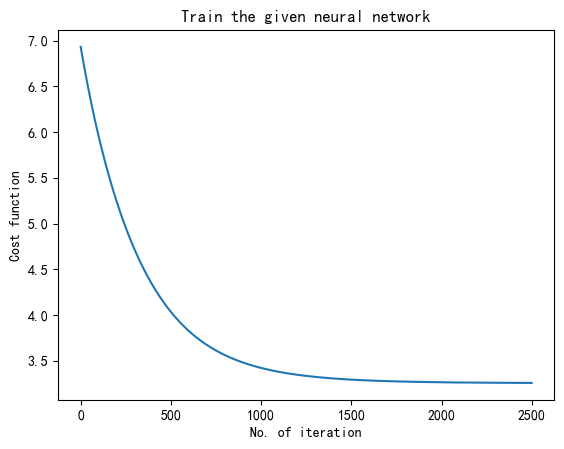

In [11]:
plt.plot(range(len(J[0:2500])), J[0:2500])
plt.xlabel('No. of iteration')
plt.ylabel('Cost function')
plt.title('Train the given neural network')